# TOTALE

### CREAZIONE DELL'OGGETTO PER SCIPY

In [3]:
import scanpy as sc
import anndata
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
import numpy as np
import os
import pandas as pd
import scvelo as scv

In [4]:
X = io.mmread("counts_tot.mtx")

In [5]:
# create anndata object
adata = anndata.AnnData(
    X=X.transpose().tocsr()
)

In [6]:
cell_meta = pd.read_csv("metadata_tot.csv")

In [7]:
with open("gene_names_tot.csv", 'r') as f:
    gene_names = f.read().splitlines()

In [8]:
adata.obs = cell_meta
adata.obs.index = adata.obs['barcode']
adata.var.index = gene_names

In [9]:
pca = pd.read_csv("pca_tot.csv")
pca.index = adata.obs.index

In [10]:
adata.obsm['X_pca'] = pca.to_numpy()
adata.obsm['X_umap'] = np.vstack((adata.obs['UMAP_1'].to_numpy(), adata.obs['UMAP_2'].to_numpy())).T

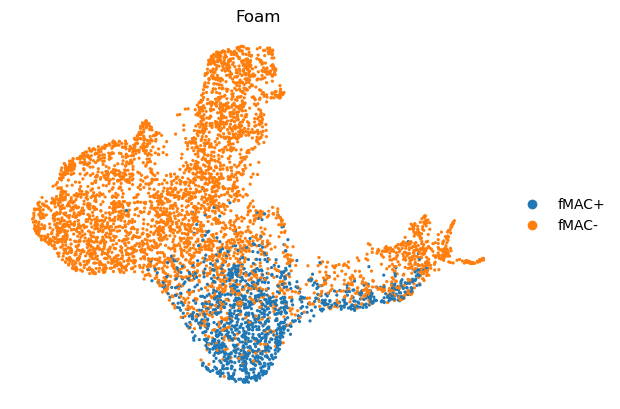

In [11]:
sc.pl.umap(adata, color=['Foam'], frameon=False,
#          palette=["#73bfb8", "#3da5d9", "#fec601", "#2364aa", "#ea7317"]
          )

In [10]:
#subset!
#adata = adata[adata.obs['Sample'].isin(['WT_Cold', "KO_Cold"])]

### VELOCITY with scVELO

In [12]:
len(adata.obs.index)

5578

In [13]:
adata.obs.index

Index(['wt_AAACCCAAGGTGGTTG-1', 'wt_AAACGAAAGGTGCCTC-1',
       'wt_AAACGCTGTCGAGCTC-1', 'wt_AAAGAACAGATAGCTA-1',
       'wt_AAAGGATCAGTAGTGG-1', 'wt_AAAGGATCATCTTAGG-1',
       'wt_AAAGGATGTGGTCAAG-1', 'wt_AAAGGGCGTTAGTTCG-1',
       'wt_AAAGGTAAGGGACTGT-1', 'wt_AAAGGTACAAGGTTGG-1',
       ...
       'hfd_TTTCGATCAGGCTACC-1', 'hfd_TTTCGATGTCGAAGCA-1',
       'hfd_TTTGATCTCTGAGGCC-1', 'hfd_TTTGGAGTCTTCTAAC-1',
       'hfd_TTTGGTTCACATTCGA-1', 'hfd_TTTGGTTCACCTAAAC-1',
       'hfd_TTTGGTTGTGTAACGG-1', 'hfd_TTTGGTTGTTGTAGCT-1',
       'hfd_TTTGTTGTCTGTAACG-1', 'hfd_TTTGTTGTCTTGGAAC-1'],
      dtype='object', name='barcode', length=5578)

In [14]:
#WT
ldata1 = scv.read('../rawdata/wt/velocyto/possorted_genome_bam_TR9KP.loom', cache=True)
barcodes = [bc.split(':')[1][:-1] for bc in ldata1.obs.index.tolist()]
barcodes = ["wt_" + b + "-1"  for b in barcodes]
ldata1.obs.index = barcodes
ldata1.obs.index

Index(['wt_AAAGTGAGTGTGTGTT-1', 'wt_AAACGAACACGTCGGT-1',
       'wt_AAAGTGATCCTAGCCT-1', 'wt_AAACGCTGTCGAGCTC-1',
       'wt_AAAGTGATCATCCCGT-1', 'wt_AAAGTCCTCCATTCAT-1',
       'wt_AAATGGACATGCAGGA-1', 'wt_AAAGGATAGGACAGTC-1',
       'wt_AACAAAGCAATTCTTC-1', 'wt_AACAAGAAGTCCCGAC-1',
       ...
       'wt_TTTGGTTCAAAGGTTA-1', 'wt_TTTGACTAGTACGTCT-1',
       'wt_TTTATGCCATTAAGCC-1', 'wt_TTTCAGTCAATCTGCA-1',
       'wt_TTTCCTCGTGTGCCTG-1', 'wt_TTTCATGAGGTCATCT-1',
       'wt_TTTGGAGTCCTCTGCA-1', 'wt_TTTCAGTAGTGCAGCA-1',
       'wt_TTTGACTTCAATCCAG-1', 'wt_TTTGGAGAGGTCGTCC-1'],
      dtype='object', length=8480)

In [15]:
#DBDB
ldata2 = scv.read('../rawdata/dbdb16w/velocyto/possorted_genome_bam_VY7AF.loom', cache=True)
barcodes = [bc.split(':')[1][:-1] for bc in ldata2.obs.index.tolist()]
barcodes = ["db/db_" + b + "-1" for b in barcodes]
ldata2.obs.index = barcodes
ldata2.obs.index

Index(['db/db_AAAGAACTCGCGCTGA-1', 'db/db_AAACGAATCTCCAAGA-1',
       'db/db_AAACGAATCATTTGCT-1', 'db/db_AAAGGTAAGGACATCG-1',
       'db/db_AACAACCAGATACTGA-1', 'db/db_AAAGGTACACGTACAT-1',
       'db/db_AACAAGAAGCTTAGTC-1', 'db/db_AAACCCAGTGGACTGA-1',
       'db/db_AAACGAATCGAAGCCC-1', 'db/db_AAAGGTACACCTCTGT-1',
       ...
       'db/db_TTTATGCTCCGTAATG-1', 'db/db_TTTATGCGTCAGGAGT-1',
       'db/db_TTTAGTCTCAAATAGG-1', 'db/db_TTTAGTCAGAAGTGTT-1',
       'db/db_TTTACTGTCCACACAA-1', 'db/db_TTTGATCGTTGCTCGG-1',
       'db/db_TTTGGTTTCCTGGGTG-1', 'db/db_TTTGACTCATGGAAGC-1',
       'db/db_TTTGACTTCCTCAGGG-1', 'db/db_TTTCCTCTCCTGTAGA-1'],
      dtype='object', length=6794)

In [16]:
#COLD KO
ldata3 = scv.read('../rawdata/hfd/velocyto/possorted_genome_bam_6ORC6.loom', cache=True)
barcodes = [bc.split(':')[1][:-1] for bc in ldata3.obs.index.tolist()]
barcodes = ["hfd_" + b + "-1" for b in barcodes]
ldata3.obs.index = barcodes
ldata3.obs.index

Index(['hfd_AAACGAAAGCATCGAG-1', 'hfd_AAACGCTGTGCATTTG-1',
       'hfd_AAACGCTTCTGCTTAT-1', 'hfd_AAAGAACAGTCACACT-1',
       'hfd_AAACGCTTCTTACGGA-1', 'hfd_AAACGCTCAGTATACC-1',
       'hfd_AAACGAAAGTCGAAGC-1', 'hfd_AAACCCATCCTACGAA-1',
       'hfd_AAACGCTGTACTTCCC-1', 'hfd_AAACCCAAGCGGTAAC-1',
       ...
       'hfd_TTTGTTGTCAACACGT-1', 'hfd_TTTGGTTAGCCAGTAG-1',
       'hfd_TTTGACTGTCTTTCAT-1', 'hfd_TTTGGTTCACATTCGA-1',
       'hfd_TTTGGTTGTTGTAGCT-1', 'hfd_TTTGATCCACAGCTTA-1',
       'hfd_TTTGGTTTCTTGTTAC-1', 'hfd_TTTGGAGCACTAACCA-1',
       'hfd_TTTGGTTAGATAACGT-1', 'hfd_TTTGGTTCACCTAAAC-1'],
      dtype='object', length=21399)

In [17]:
ldata1.var_names_make_unique()
ldata2.var_names_make_unique()
ldata3.var_names_make_unique()

In [18]:
ldata = ldata1.concatenate([ldata2,ldata3])
ldata.obs.index

Index(['wt_AAAGTGAGTGTGTGTT-1-0', 'wt_AAACGAACACGTCGGT-1-0',
       'wt_AAAGTGATCCTAGCCT-1-0', 'wt_AAACGCTGTCGAGCTC-1-0',
       'wt_AAAGTGATCATCCCGT-1-0', 'wt_AAAGTCCTCCATTCAT-1-0',
       'wt_AAATGGACATGCAGGA-1-0', 'wt_AAAGGATAGGACAGTC-1-0',
       'wt_AACAAAGCAATTCTTC-1-0', 'wt_AACAAGAAGTCCCGAC-1-0',
       ...
       'hfd_TTTGTTGTCAACACGT-1-2', 'hfd_TTTGGTTAGCCAGTAG-1-2',
       'hfd_TTTGACTGTCTTTCAT-1-2', 'hfd_TTTGGTTCACATTCGA-1-2',
       'hfd_TTTGGTTGTTGTAGCT-1-2', 'hfd_TTTGATCCACAGCTTA-1-2',
       'hfd_TTTGGTTTCTTGTTAC-1-2', 'hfd_TTTGGAGCACTAACCA-1-2',
       'hfd_TTTGGTTAGATAACGT-1-2', 'hfd_TTTGGTTCACCTAAAC-1-2'],
      dtype='object', length=36673)

In [19]:
barcodes = [bc[:-2] for bc in ldata.obs.index.tolist()]
ldata.obs.index = barcodes
ldata.obs.index

Index(['wt_AAAGTGAGTGTGTGTT-1', 'wt_AAACGAACACGTCGGT-1',
       'wt_AAAGTGATCCTAGCCT-1', 'wt_AAACGCTGTCGAGCTC-1',
       'wt_AAAGTGATCATCCCGT-1', 'wt_AAAGTCCTCCATTCAT-1',
       'wt_AAATGGACATGCAGGA-1', 'wt_AAAGGATAGGACAGTC-1',
       'wt_AACAAAGCAATTCTTC-1', 'wt_AACAAGAAGTCCCGAC-1',
       ...
       'hfd_TTTGTTGTCAACACGT-1', 'hfd_TTTGGTTAGCCAGTAG-1',
       'hfd_TTTGACTGTCTTTCAT-1', 'hfd_TTTGGTTCACATTCGA-1',
       'hfd_TTTGGTTGTTGTAGCT-1', 'hfd_TTTGATCCACAGCTTA-1',
       'hfd_TTTGGTTTCTTGTTAC-1', 'hfd_TTTGGAGCACTAACCA-1',
       'hfd_TTTGGTTAGATAACGT-1', 'hfd_TTTGGTTCACCTAAAC-1'],
      dtype='object', length=36673)

In [20]:
adata = scv.utils.merge(adata, ldata)

In [21]:
adata.obs.index
len(adata.obs.index)

5578

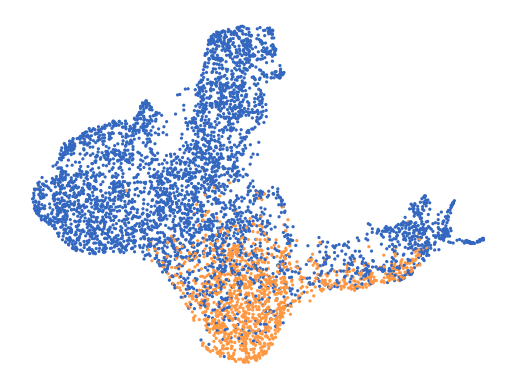

In [22]:
sc.pl.umap(adata, color='Foam', frameon=False, legend_loc='', title='', palette=["#FF9843","#3468C0","#86A7FC","#FFDD95"])

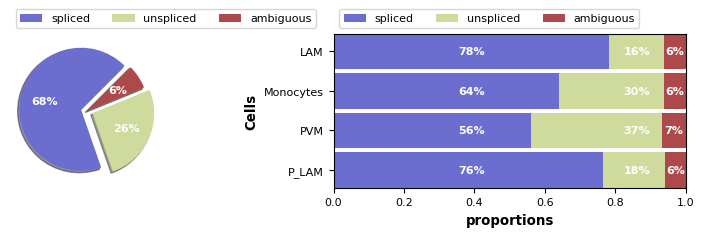

In [23]:
scv.pl.proportions(adata, groupby='Cells')

categories: LAM, Monocytes, PVM, etc.
var_group_labels: fMAC+, fMAC-


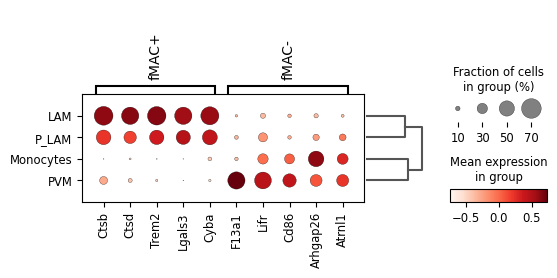

In [25]:
sc.pp.scale(adata, max_value=10)
sc.tl.rank_genes_groups(adata,'Foam', use_raw=False)
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, groupby='Cells', use_raw=False, 
                                dendrogram=True)

In [25]:
# se è integrato non va normalizzato!
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata)

Normalized count data: spliced, unspliced.


/home/andrea/anaconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Logarithmized X.
computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [26]:
scv.tl.recover_dynamics(adata, n_jobs=16)

recovering dynamics (using 16/16 cores)


  0%|          | 0/32245 [00:00<?, ?gene/s]

skipping bimodality check for Usp39: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data..
skipping bimodality check for Helz2: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data..
not recoverable due to insufficient samples.
skipping bimodality check for Gm9733: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data

In [27]:
adata.write("MACs_Foam.h5")

In [2]:
adata = sc.read("MACs_Foam.h5")

In [28]:
scv.tl.velocity(adata, mode="dynamical") #separately as a oneliner, not in the 'cell'...
scv.tl.velocity_graph(adata) #separately... and the note in the next line the basis as 'umap' and not 'X_umap'

Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:04) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:03) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:27) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/16 cores)


  0%|          | 0/5578 [00:00<?, ?cells/s]

    finished (0:00:08) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


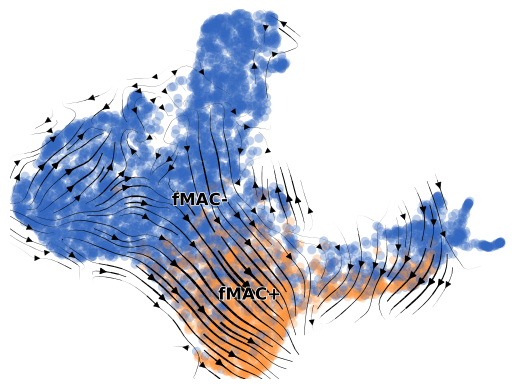

In [29]:
scv.pl.velocity_embedding_stream(adata, basis="umap", legend_fontsize=12, title="", smooth=0.8, min_mass=1,
                                color="Foam")

In [30]:
#from scipy.stats.stats import rankdata
scv.tl.rank_velocity_genes(adata, groupby='Foam', n_genes=200)
df = scv.core.get_df(adata.uns['rank_velocity_genes']['names'])

df.to_excel("Velocity_FoamGene_TOT.xlsx", index=False)

df.head()

ranking velocity genes


/home/andrea/anaconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/tools/utils.py:463: DeprecationWarning: Please use `rankdata` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import rankdata


    finished (0:00:16) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


fMAC+     fMAC-
0   Nedd8     Tppp3
1    Rps3      Irf7
2  S100a6      Gbp3
3   Fxyd5     Dusp2
4   Rpl38  Arhgef18

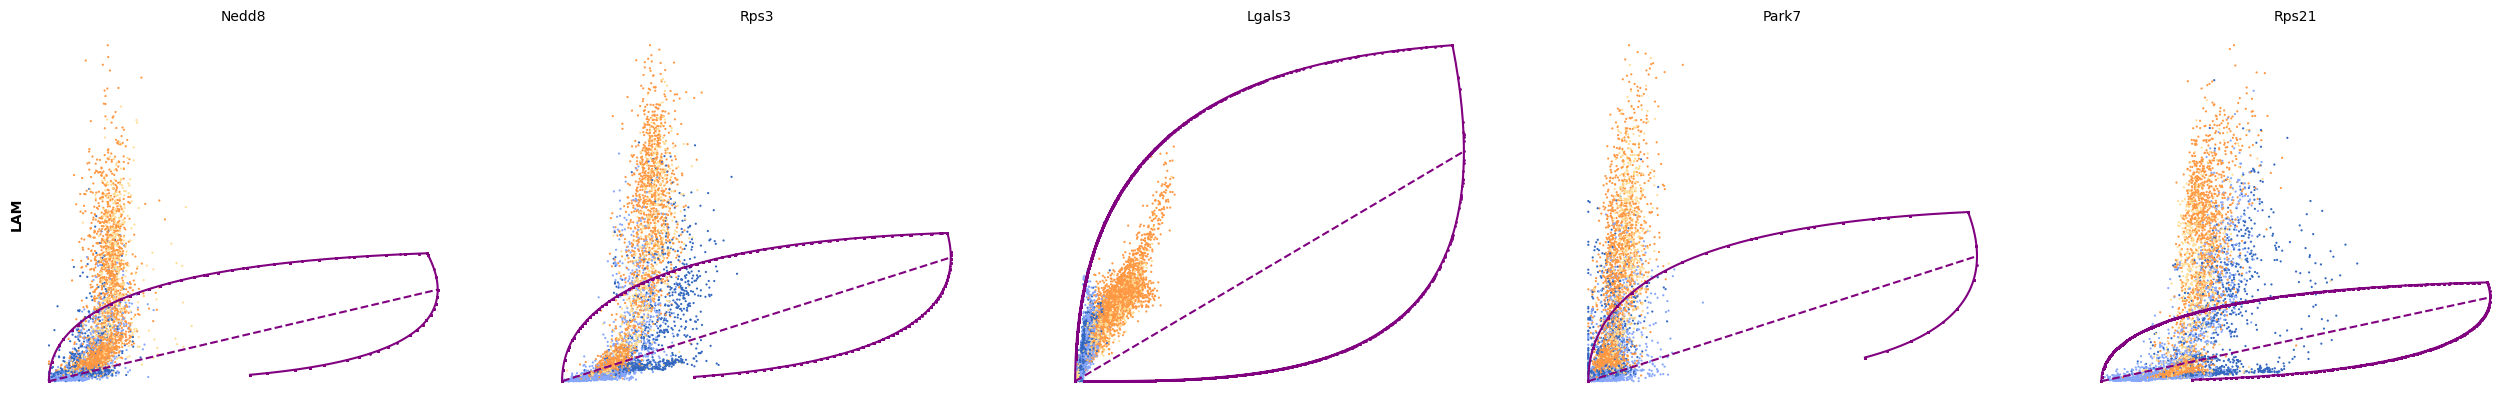

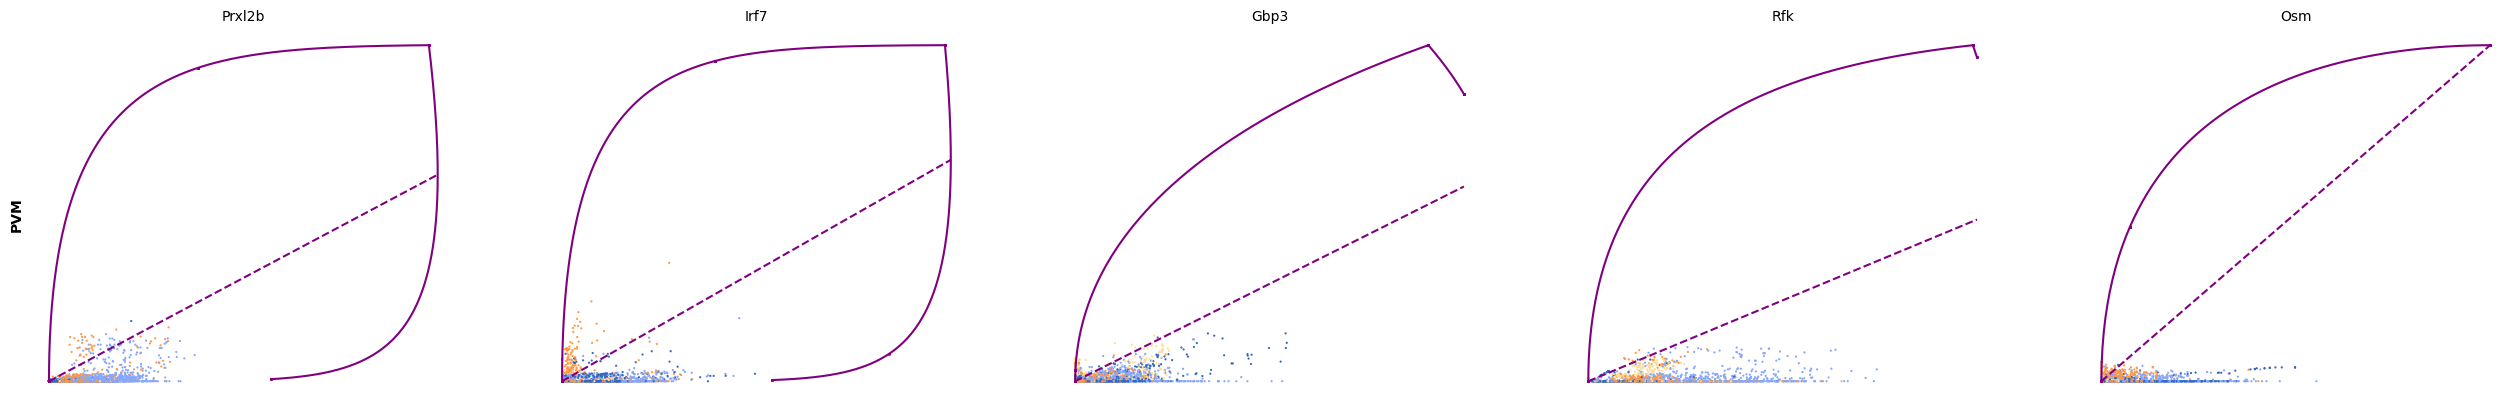

In [14]:
scv.pl.scatter(adata, df['LAM'][:5], ylabel='LAM', frameon=False, color='Cells', size=10, linewidth=1.5)
scv.pl.scatter(adata, df['PVM'][:5], ylabel='PVM', frameon=False, color='Cells', size=10, linewidth=1.5)

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


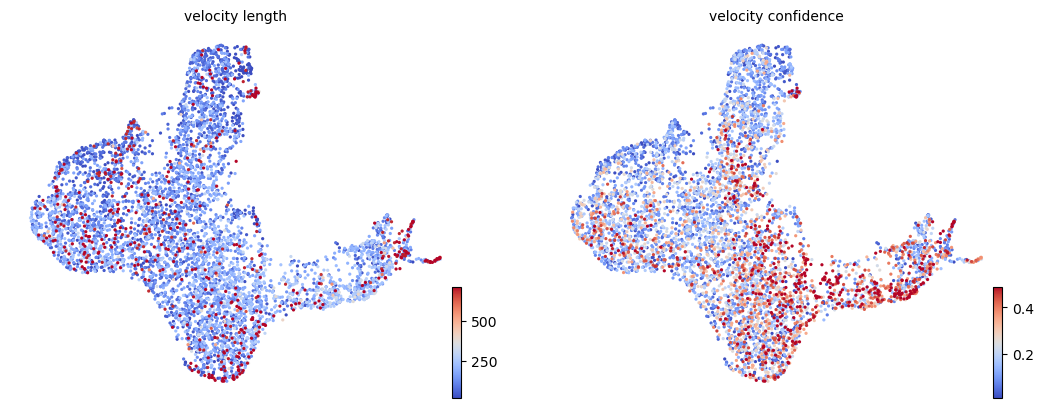

In [15]:
scv.tl.velocity_confidence(adata)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])

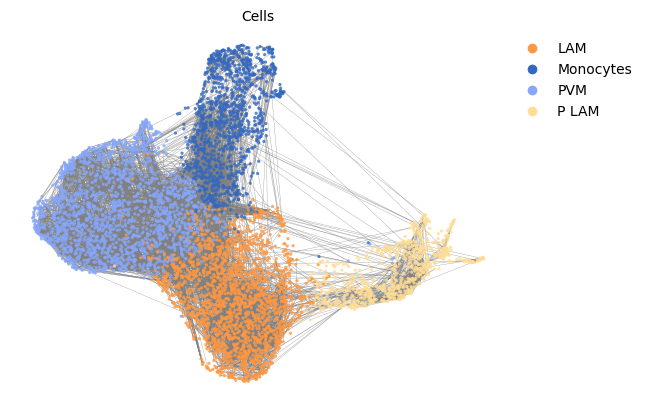

In [16]:
scv.pl.velocity_graph(adata, threshold=.3, color='Cells')

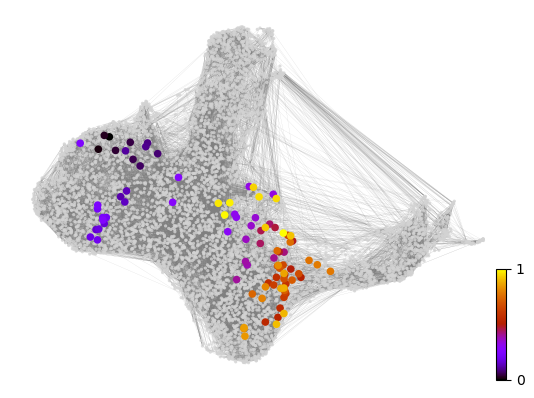

In [17]:
x, y = scv.utils.get_cell_transitions(adata, basis='umap', starting_cell=70)
ax = scv.pl.velocity_graph(adata, c='lightgrey', edge_width=.05, show=False)
ax = scv.pl.scatter(adata, x=x, y=y, s=120, c='ascending', cmap='gnuplot', ax=ax)

computing terminal states
    identified 2 regions of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


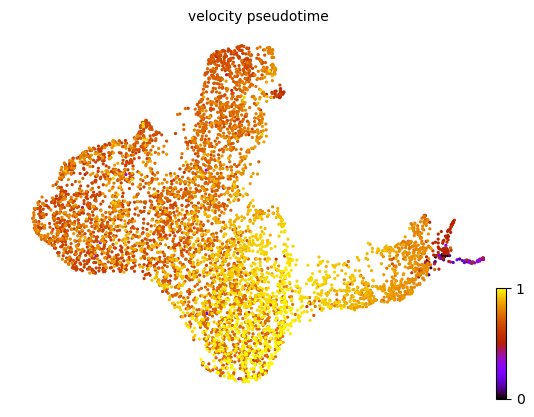

In [18]:
#scv.tl.velocity_pseudotime(adata)
scv.tl.velocity_pseudotime(adata)
scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot')

In [19]:
# this is needed due to a current bug - bugfix is coming soon.
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']

scv.tl.paga(adata, groups='Cells')
#df = scv.get_df(adata, 'paga/transitions_confidence', precision=2).T

running PAGA using priors: ['velocity_pseudotime']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


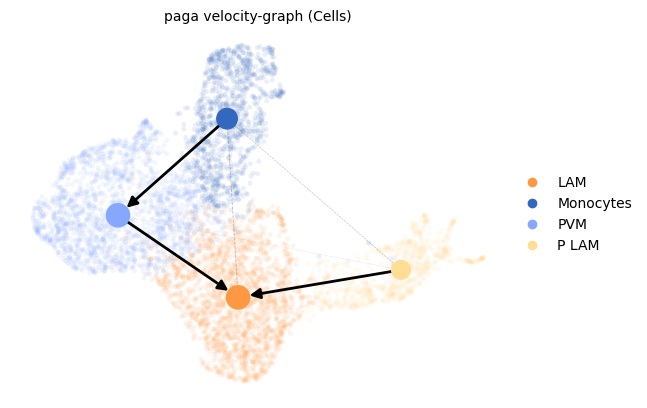

In [20]:
scv.pl.paga(adata, basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5 
            )

computing latent time using root_cells as prior
    finished (0:00:01) --> added 
    'latent_time', shared time (adata.obs)


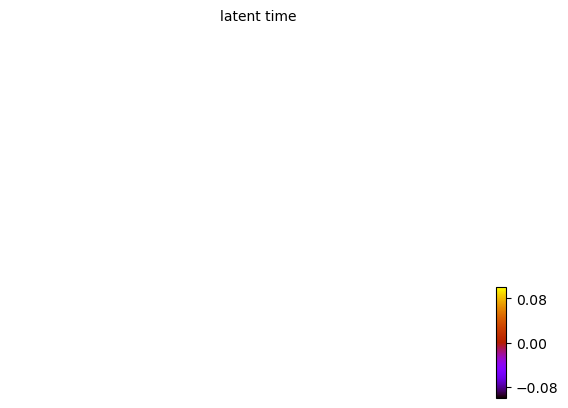

In [21]:
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=80)

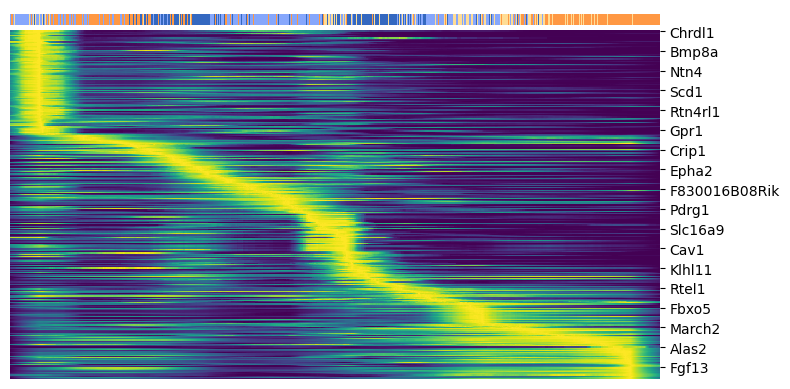

In [23]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(adata, var_names=top_genes, sortby='velocity_pseudotime', col_color='Cells',
               n_convolve=500)

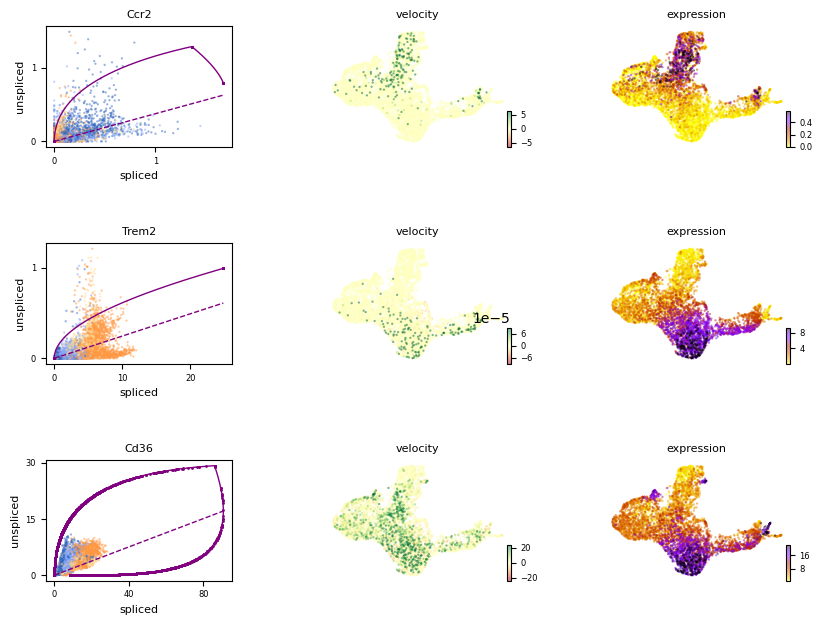

In [24]:
scv.pl.velocity(adata, ['Ccr2','Trem2', 'Cd36'], ncols=1, color='Cells')

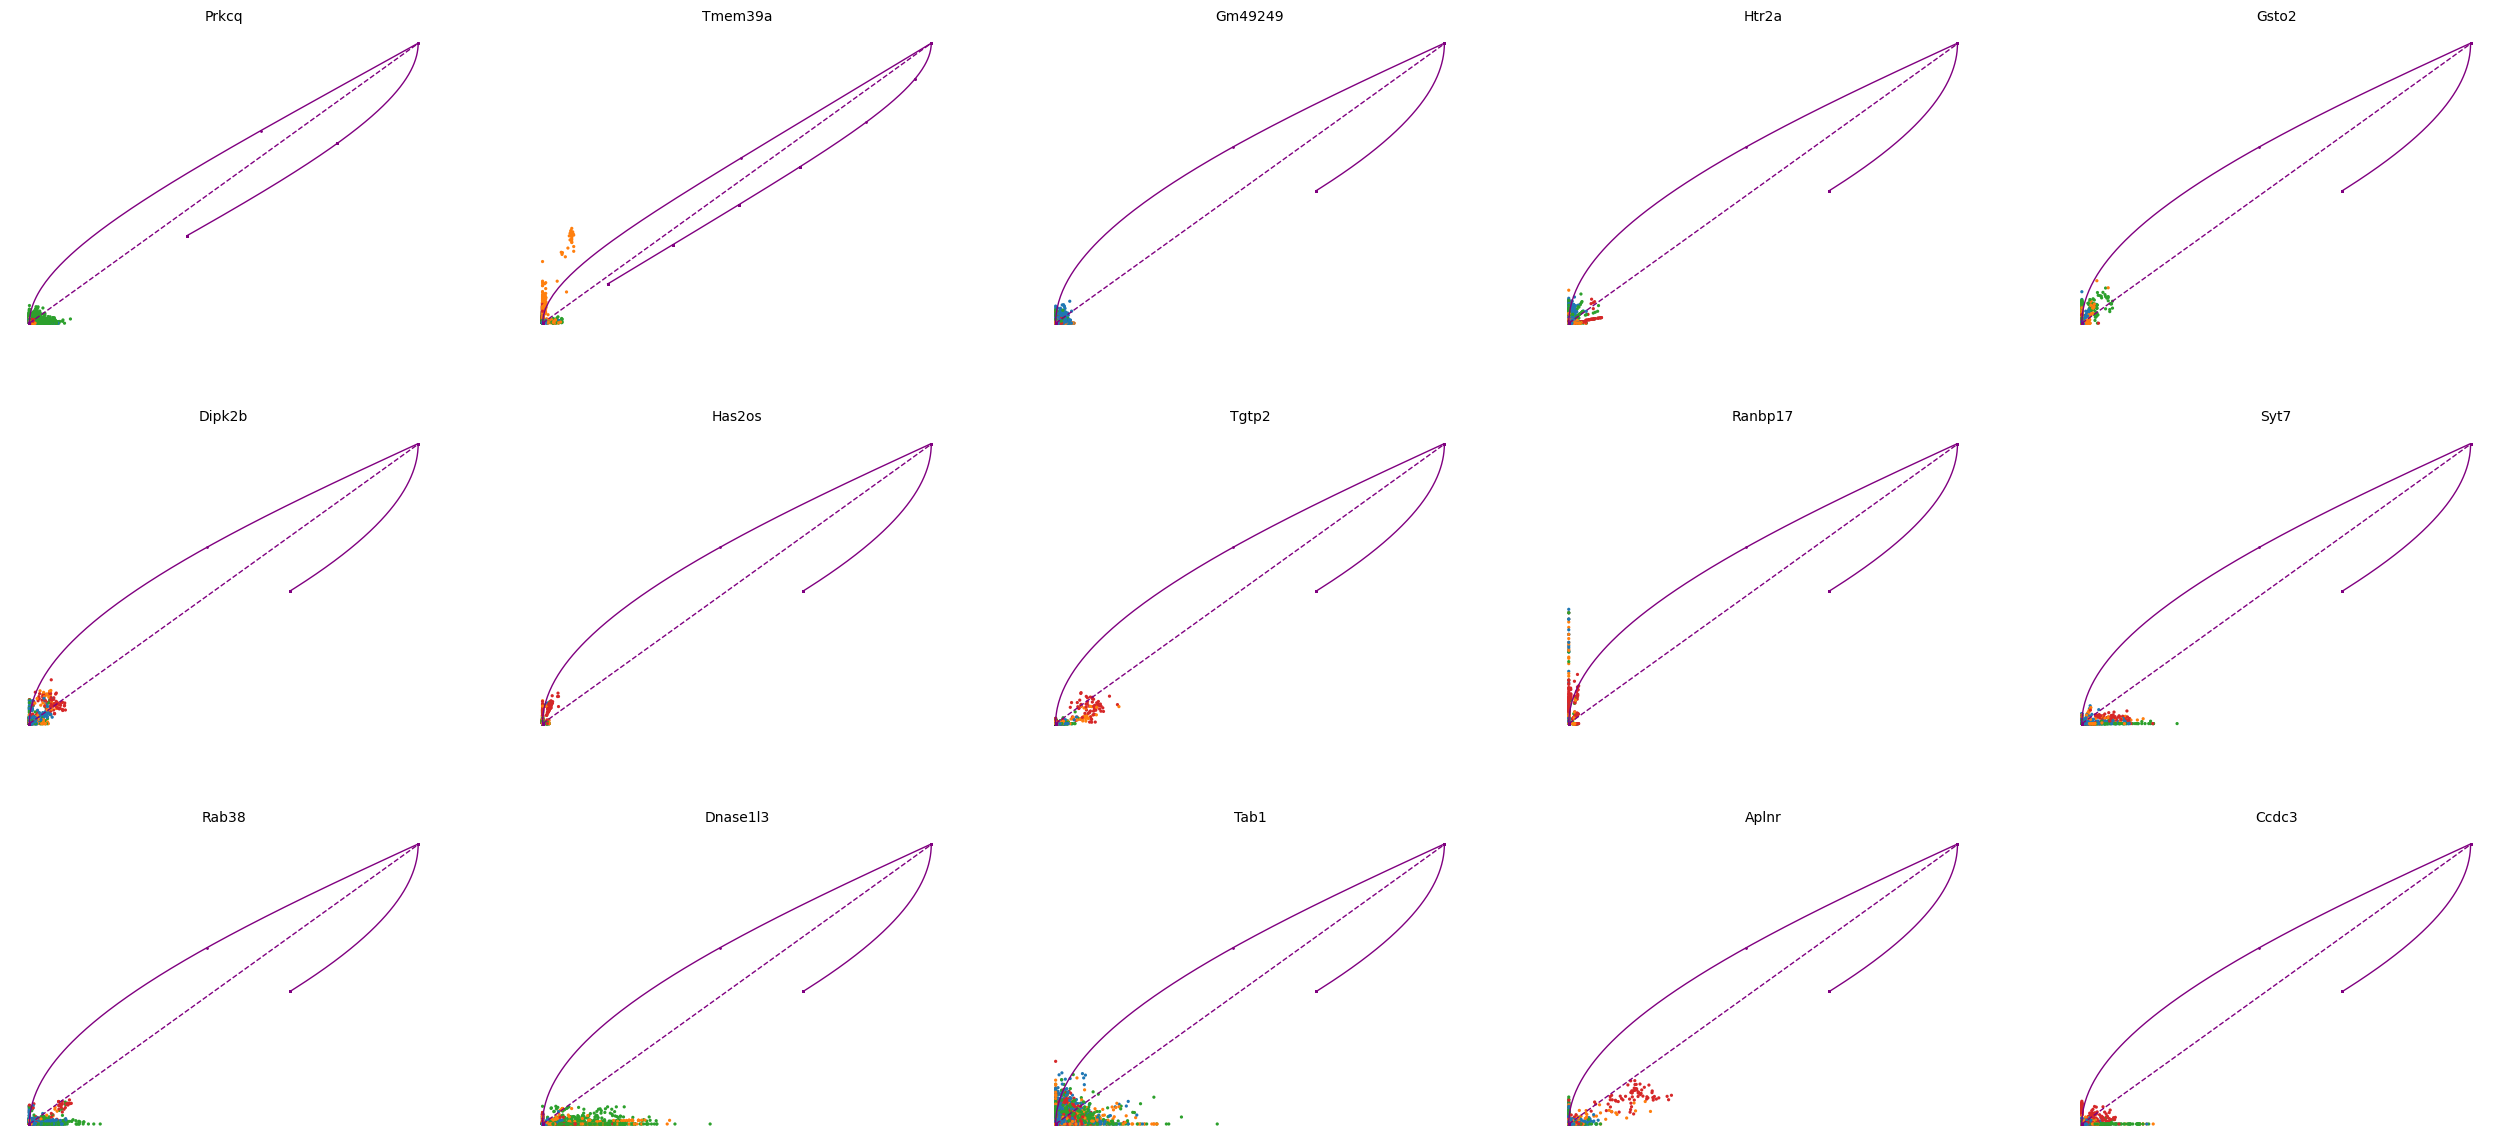

In [28]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index
scv.pl.scatter(adata, color='Cells', basis=top_genes[:15], ncols=5, frameon=False)

In [29]:
top_genes[:30]

Index(['Prkcq', 'Tmem39a', 'Gm49249', 'Htr2a', 'Gsto2', 'Dipk2b', 'Has2os',
       'Tgtp2', 'Ranbp17', 'Syt7', 'Rab38', 'Dnase1l3', 'Tab1', 'Aplnr',
       'Ccdc3', '1110002J07Rik', 'Ncald', 'Gramd1c', 'Sbk1', 'Twist2', 'Mbnl3',
       'Bmp8a', 'Ppm1e', 'March2', 'Chic1', 'Gm12353', 'Col5a2', 'Errfi1',
       '9530026P05Rik', 'Dll4'],
      dtype='object')

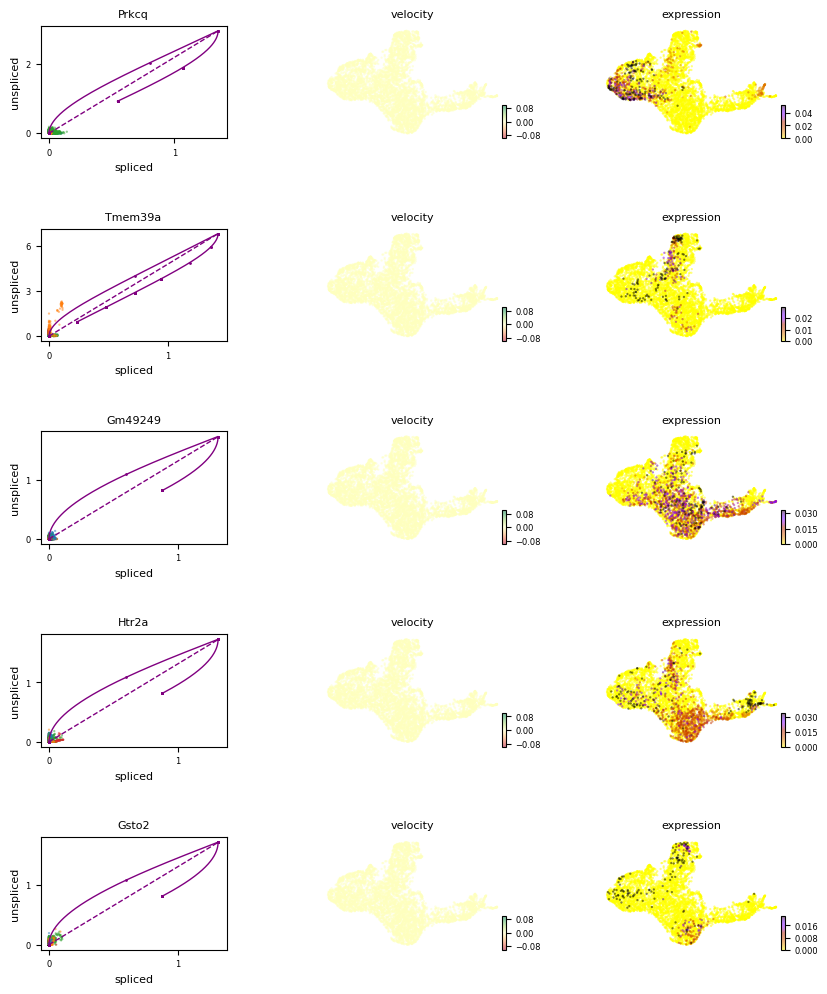

In [30]:
scv.pl.velocity(adata, top_genes[:5], ncols=1, color='Cells')

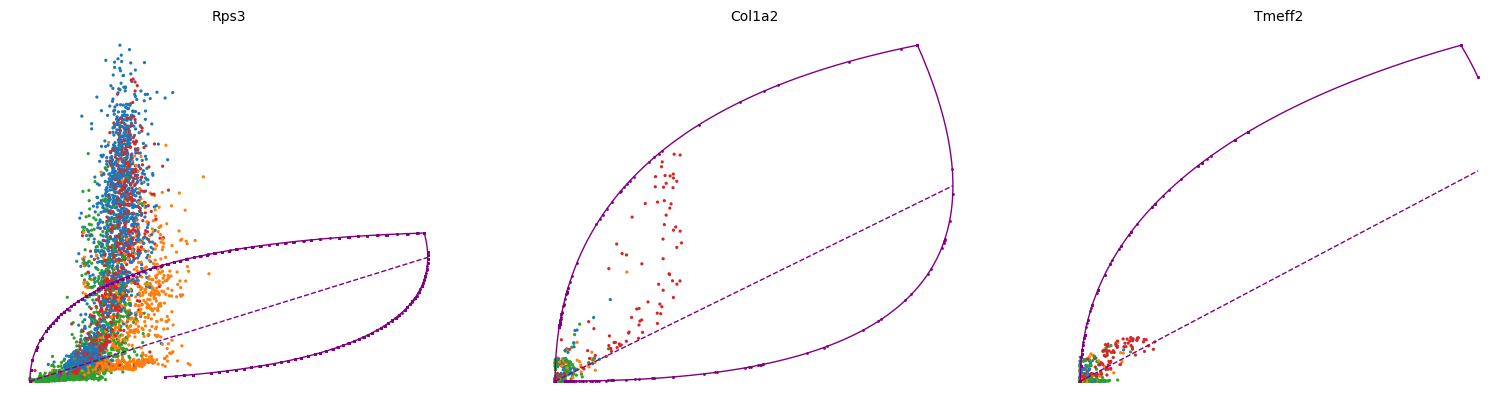

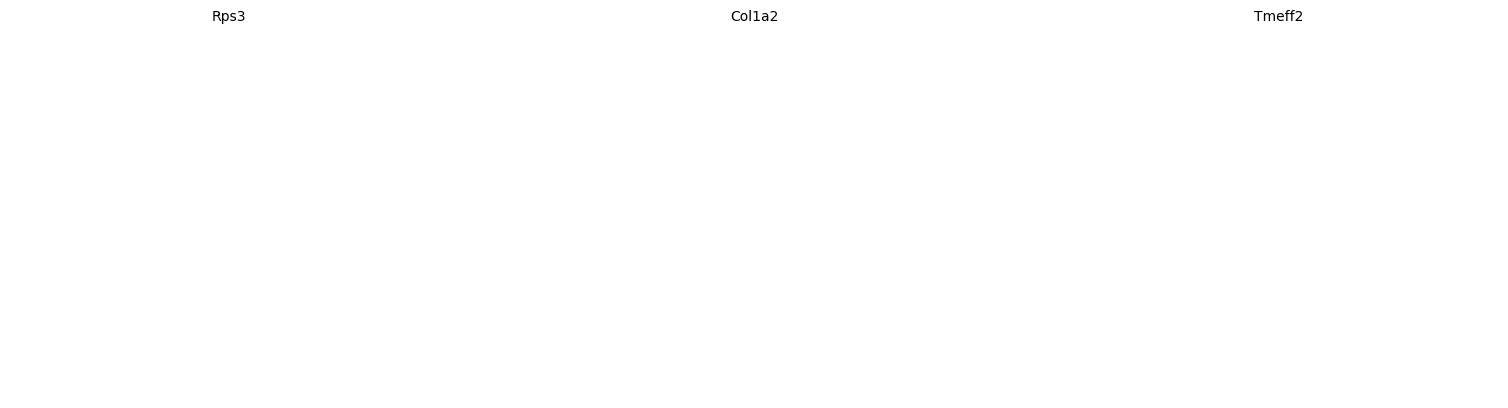

In [31]:
var_names = ['Rps3', 'Col1a2', 'Tmeff2']
scv.pl.scatter(adata, var_names, color='Cells', frameon=False)
scv.pl.scatter(adata, x='latent_time', y=var_names, color='Cells', frameon=False)

In [32]:
scv.tl.score_genes_cell_cycle(adata)

calculating cell cycle phase
-->     'S_score' and 'G2M_score', scores of cell cycle phases (adata.obs)


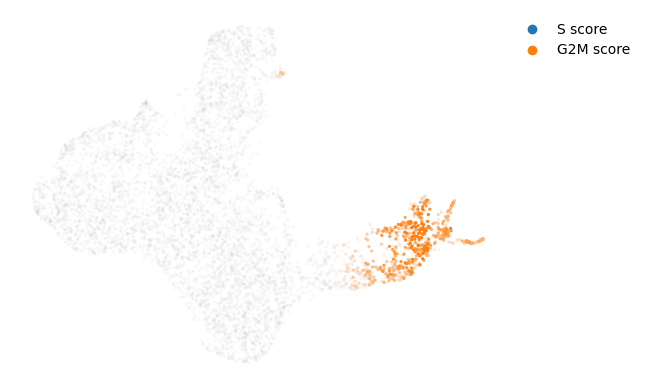

In [33]:
scv.pl.scatter(adata, color_gradients=['S_score', 'G2M_score'], smooth=True, perc=[5, 95])

In [34]:
from velodyn.velocity_divergence import compute_div, plot_div

D = compute_div(
    adata=adata,
    use_rep='umap',
    n_grid_points=100,
)
print(D.shape) # (30, 30,)

fig, ax = plot_div(D)

ModuleNotFoundError: No module named 'velodyn'

In [ ]:
from velodyn.velocity_dpst import dPseudotime

DPST = dPseudotime(
    adata=adata,
    use_rep='umap',
    pseudotime_var='velocity_pseudotime',
)
change_in_pseudotime = DPST.predict_dpst()